
# Implementación de Regularización Lasso en Modelos de Regresión Lineal - Precio de Vehículos

El siguiente ejercicio es la continuación del análisis realizado sobre el precio de los vehículos, donde primero se llevó a cabo una limpieza de datos y, posteriormente, un análisis exploratorio de datos (EDA) para extraer información valiosa. Finalmente, se implementó un modelo de regresión lineal para predecir el precio de los vehículos en función de sus características principales. El modelo generado obtuvo un coeficiente de determinación $R^2$ de 0.69, lo que indica que el modelo puede explicar el 69% de la variabilidad de la variable dependiente a través del conjunto de características.

Link ➡️ [Predicción de Precio de Vehículos - Análisis Exploratorio de Datos (EDA) y Regresión Lineal Múltiple](https://analisishectorrodriguez.blogspot.com/2024/05/prediccion-de-precio-de-vehiculos.html)

En este ejercicio, vamos a explorar otros modelos de regresión lineal con el objetivo de mejorar la precisión del modelo que hemos creado. Para ello, generaremos un modelo de regresión polinómica y utilizaremos la estrategia de regularización Lasso. Además, evaluaremos las condiciones que debe cumplir un modelo de regresión lineal para que las predicciones sean válidas.

# Librerías

Las librerías que vamos a utilizar son:

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LassoCV, Lasso
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats

#Configuración Gráficas y tablas
# ==============================================================================
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [6, 4.5]
palette = ["#003049","#d62828","#f77f00","#fcbf49","#eae2b7"]
sns.set_theme( palette= palette, context= "notebook")
pd.options.display.float_format = '{:.2f}'.format


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')



# 1. Descripción del Problema

Partiremos del conjunto de datos limpio creado a partir el ejercicio *"Predicción de Precio de Vehículos - Análisis Exploratorio de Datos (EDA) y Regresión Lineal Múltiple"*. Nuestro objetivo será implementar un modelo de regresión lineal con regularización Lasso con el fin de mejorar la predicción del precio de los vehículos y evaluar que las predicciones del modelo sean válidas. En este caso, utilizaremos principalmente la librería scikit-learn, ya que nos proporciona facilidades para la creación y evaluación de los diferentes modelos de regresión lineal.

# 2. Ingresamos el Conjunto de Datos que Vamos a Utilizar

El archivo *.csv* lo puedes encontrar en el siguiente enlace:

<https://drive.google.com/uc?export=download&id=1hbxLKDI58miwGsj4fmwPDASG-uJmdIZH>

A continuación, realizaremos la carga del conjunto de datos con el que vamos a crear los modelos de regresión lineal para poder predecir el precio de los vehículos a partir de sus principales características:

In [2]:
# Importamos el conjunto de datos que vamos a utilizar para el análisis de regresión lineal múltiple
# ==============================================================================

df = pd.read_csv("https://drive.google.com/uc?export=download&id=1hbxLKDI58miwGsj4fmwPDASG-uJmdIZH")
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,74.00,5.00
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,103.52,5.00
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.00,78.00,5.00
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,90.00,5.00
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.00,88.20,5.00
...,...,...,...,...,...,...,...,...,...,...,...
7898,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.00,82.85,5.00
7899,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.00,110.00,5.00
7900,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.00,73.90,5.00
7901,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.00,70.00,5.00


# 3. Resúmenes de Datos

A continuación, realizaremos los resúmenes de datos para comprender el conjunto de datos. Sin embargo, se lleva a cabo un análisis detallado sobre cada una de las variables en el ejercicio titulado *'Predicción de Precio de Vehículos - Análisis Exploratorio de Datos (EDA) y Regresión Lineal Múltiple'*.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7903 entries, 0 to 7902
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7903 non-null   int64  
 1   selling_price  7903 non-null   int64  
 2   km_driven      7903 non-null   int64  
 3   fuel           7903 non-null   object 
 4   seller_type    7903 non-null   object 
 5   transmission   7903 non-null   object 
 6   owner          7903 non-null   object 
 7   mileage        7903 non-null   float64
 8   engine         7903 non-null   float64
 9   max_power      7903 non-null   float64
 10  seats          7903 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 679.3+ KB


Como podemos observar, ya tenemos el conjunto de datos limpio. Ahora procederemos a calcular los principales estadísticos descriptivos de las variables cuantitativas.

In [4]:
# Calculamos los estadísticos descriptivos de las variables cuantitativas
# ==============================================================================

df.describe(include=[np.number])

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7903.00,7903.00,7903.00,7903.00,7903.00,7903.00,7903.00
mean,2013.98,648662.19,68722.65,19.42,1458.59,91.54,5.42
std,3.86,806907.04,47986.71,4.03,503.88,35.58,0.96
min,1994.00,29999.00,1.00,0.00,624.00,32.80,2.00
25%,2012.00,270000.00,35000.00,16.78,1197.00,68.05,5.00
50%,2015.00,450000.00,60000.00,19.30,1248.00,82.00,5.00
75%,2017.00,690000.00,95100.00,22.32,1582.00,102.00,5.00
max,2020.00,7200000.00,577414.00,33.44,3604.00,282.00,14.00


Ahora calcularemos los principales estadísticos descriptivos de las variables cualitativas de nuestro conjunto de datos

In [5]:
# Calculamos los estadísticos descriptivos de las variables cualitativas de nuestro conjunto de datos
# ==============================================================================

df.describe(include="object")

,fuel,seller_type,transmission,owner
count,7903,7903,7903,7903
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,4298,6560,6863,5213


# 4. Transformación de Características

Modificaremos la variable *"year"* para que, en lugar de representar el año del modelo del vehículo, represente su antigüedad relativa en años. Esta transformación, al convertirla en una medida relativa, reducirá la correlación directa con otras variables. Esta reducción puede ayudar a disminuir la multicolinealidad en el modelo de regresión lineal que vamos a crear.

In [6]:
# Modificamos la columna year para que represente la antigüedad de los vehículos en lugar del año
# ==============================================================================

df.insert(0, "Age", 2024 - df["year"])
df.head()

,Age,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,10,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,74.00,5.00
1,10,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,103.52,5.00
2,18,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.00,78.00,5.00
3,14,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,90.00,5.00
4,17,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.00,88.20,5.00


Ahora eliminamos la columna *"year"* del conjunto de datos.

In [7]:
# Eliminamos la columna year del conjunto de datos
# ==============================================================================

df = df.drop(columns = ["year"])
df.head()

,Age,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,10,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,74.00,5.00
1,10,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,103.52,5.00
2,18,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.00,78.00,5.00
3,14,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,90.00,5.00
4,17,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.00,88.20,5.00


# 5. Codificación de Variables Categóricas

A continuación realizaremos el mapeo numérico de las variables cualitativas, mediante la librería de *pandas*.

In [8]:
# Codificación de variables categóricas con la instrucción get_dummies de pandas
# ==============================================================================

caracteristicas = df.select_dtypes(include= "object").drop("fuel", axis= 1).columns
caracteristicas

df = pd.get_dummies(df, columns= caracteristicas, drop_first= True)
df = pd.get_dummies(df, columns = ["fuel"]).drop("fuel_Diesel", axis = 1) * 1

df

,Age,selling_price,km_driven,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_CNG,fuel_LPG,fuel_Petrol
0,10,450000,145500,23.40,1248.00,74.00,5.00,1,0,1,0,0,0,0,0,0,0
1,10,370000,120000,21.14,1498.00,103.52,5.00,1,0,1,0,1,0,0,0,0,0
2,18,158000,140000,17.70,1497.00,78.00,5.00,1,0,1,0,0,0,1,0,0,1
3,14,225000,127000,23.00,1396.00,90.00,5.00,1,0,1,0,0,0,0,0,0,0
4,17,130000,120000,16.10,1298.00,88.20,5.00,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,11,320000,110000,18.50,1197.00,82.85,5.00,1,0,1,0,0,0,0,0,0,1
7899,17,135000,119000,16.80,1493.00,110.00,5.00,1,0,1,1,0,0,0,0,0,0
7900,15,382000,120000,19.30,1248.00,73.90,5.00,1,0,1,0,0,0,0,0,0,0
7901,11,290000,25000,23.57,1396.00,70.00,5.00,1,0,1,0,0,0,0,0,0,0


# 6. Creación del Modelo de Regresión Lineal Múltiple

En esta sección nos enfocaremos en la creación del modelo de regresión lineal multiple.

## 6.1 Conjunto de variables independientes y la variable dependiente

A continuación, es necesario definir qué variables formarán parte del conjunto de características y cuál será la variable dependiente.

In [9]:
# Definimos las variables X e y para el modelo de regresión lineal múltiple que vamos a implementar
# ==============================================================================

X = df.drop("selling_price", axis= 1)
y = df["selling_price"].values.reshape(-1, 1)

## 6.2 División del conjunto de datos en entrenamiento y prueba

A continuación, procederemos a dividir nuestro conjunto de datos en dos partes: Un conjunto de entrenamiento y otro de prueba. Los datos de entrenamiento se utilizarán para alimentar el modelo durante su proceso de aprendizaje, mientras que los datos de prueba servirán para evaluar la precisión y el rendimiento del modelo. La división se realizará utilizando una proporción del 75% para los datos de entrenamiento y el 25% restante para los datos de prueba.

In [10]:
# Dividimos el conjunto de datos en dos subconjuntos
# ==============================================================================

X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1), 
                                                    test_size= 0.25, 
                                                    random_state= 1234, 
                                                    shuffle= True)

print(f"Dimensiones del X_train: {X_train.shape}")
print(f"Dimensiones del X_test: {X_test.shape}")
print(f"Dimensiones del y_train : {y_train.shape}")
print(f"Dimensiones del y_test: {y_test.shape}")

Dimensiones del X_train: (5927, 16)
Dimensiones del X_test: (1976, 16)
Dimensiones del y_train : (5927,)
Dimensiones del y_test: (1976,)


## 6.3 Escalamos el Conjunto de Características

A continuación, realizaremos el escalado del conjunto de características con la finalidad de que todas las variables se encuentren en la misma escala. El escalado de características nos asegura la integridad de las relaciones y evita sesgos en el modelo generado.

In [11]:
# Escalamos las variables del conjunto de datos con la instrucción StandardScaler de sklearn
# ==============================================================================

escalador = StandardScaler()

X_train_escaled = escalador.fit_transform(X_train)
X_test_escaled = escalador.transform(X_test)

## 6.4 Entrenamos el Modelo
Para entrenar el modelo, utilizaremos la libreria de *sklearn*

In [12]:
# Implementamos el modelo de regresión lineal múltiple con la instrucción LinearRegression de sklearn
# ==============================================================================

linear_reg = LinearRegression()
linear_reg.fit(X_train_escaled, y_train)

LinearRegression()

Vamos a observar el coeficiente de cada variable en el modelo generado

In [13]:
# Hallamos los valores de los coeficientes de la regresión lineal múltiple
# ==============================================================================

coeficientes = np.array([linear_reg.intercept_])
coeficientes = np.concatenate((coeficientes, linear_reg.coef_))

indices = ["Intercept"]
indices.extend(X.columns)

pd.DataFrame({"Coeficientes": coeficientes}, 
             index=indices).sort_values(by= "Coeficientes", 
                                        ascending= False)

,Coeficientes
Intercept,646675.10
max_power,434531.07
engine,52486.32
owner_Test Drive Car,45716.87
mileage,41289.76
fuel_LPG,12176.22
fuel_CNG,2379.16
owner_Third Owner,-2083.70
owner_Fourth & Above Owner,-3886.30
owner_Second Owner,-15502.75


# 7. Evaluación del Modelo

Ahora vamos a hallar las métricas de bondad de ajuste que nos permiten evaluar la precisión del modelo creado. Para ello, calcularemos las métricas MSE, RMSE, MAE y el coeficiente de determinación $R^2$ sobre el conjunto de datos. Para simplificar el proceso, podemos crear una función que nos permita obtener fácilmente dichas métricas.

In [14]:
# Creamos una función que nos permite evaluar el modelo de regresión lineal múltiple
# ==============================================================================

def evaluacion_modelo (modelo, X_test, y_test, nombre_modelo):
    y_predicho = modelo.predict(X_test)
    MAE = metrics.mean_absolute_error(y_test, y_predicho)
    MSE = metrics.mean_squared_error(y_test, y_predicho)
    RMSE = np.sqrt(MSE)
    R2 = metrics.r2_score(y_test, y_predicho)
    
    return pd.DataFrame({"Modelo": [nombre_modelo], 
                         "MAE": [MAE], 
                         "MSE": [MSE], 
                         "RMSE": [RMSE], 
                         "R2": [R2]
                        })

Vamos a evaluar el modelo primero con los datos de entrenamiento con la finalidad de observar las diferencias cuando se evalúe con el conjunto de datos de prueba.

In [15]:
# Evaluamos el modelo con los datos de entrenamiento
# =============================================

evaluacion_modelo(linear_reg, 
                  X_train_escaled, 
                  y_train, 
                  "Regresión Lineal Multiple - Entrenamiento")

,Modelo,MAE,MSE,RMSE,R2
0,Regresión Lineal Multiple - Entrenamiento,271542.59,200268927342.20,447514.16,0.69


Ahora vamos a evaluar el modelo con los datos de prueba.

In [16]:
# Evaluamos el modelo con los datos de prueba 
# =============================================

evaluacion_modelo(linear_reg, 
                  X_test_escaled, 
                  y_test, 
                  "Regresión Lineal Múltiple")

,Modelo,MAE,MSE,RMSE,R2
0,Regresión Lineal Múltiple,283729.66,216637730501.48,465443.58,0.67


Del modelo generado, podemos observar que al utilizar los datos de entrenamiento obtuvimos un coeficiente de determinación $R^2$ de 0.69. Sin embargo, al evaluar el modelo con los datos de prueba, este coeficiente disminuyó ligeramente a 0.67, lo que indica que este modelo de regresión lineal múltiple es capaz de explicar el 67% de la variabilidad de la variable dependiente a través del conjunto de características.

Es importante tener en cuenta que la precisión obtenida por el modelo depende en gran medida de cómo se haya realizado la división del conjunto de datos en entrenamiento y prueba. Dependiendo de los datos de entrenamiento utilizados, el rendimiento del modelo puede mejorar o empeorar. Para mitigar este problema y obtener una evaluación más robusta del modelo, podemos utilizar la *__validación cruzada__*.

## 7.1 Validación Cruzada

La técnica de Cross -Validation consiste en que, en lugar de dividir el conjunto de datos en una partición de entrenamiento y otra de prueba, como se hace en la técnica de división de datos tradicional, la validación cruzada implica dividir el conjunto de datos en múltiples subconjuntos, también llamados, *“pliegues (folds)”* (Generalmente se divide en 5 o 10 pliegues). Luego, se entrena y evalúa el modelo varias veces utilizando diferentes combinaciones de pliegues para entrenamiento y prueba. 

Este método nos permite obtener una estimación más real de las métricas de evaluación del modelo en comparación con la división tradicional. Además, para este paso implementaremos la creación de Pipelines, ya que es una manera recomendada para evitar posibles fugas de datos entre los datos de entrenamiento y el modelo. Esto garantiza que solo se utilicen los pliegues de entrenamiento al realizar el ajuste y que el conjunto de prueba (conjunto de validación) se use únicamente para calcular la puntuación de precisión en cada iteración de la validación cruzada.

In [17]:
# Realizamos la validacion Cruzada del modelo de regresión lineal múltiple
# ==============================================================================

pipeline = make_pipeline(StandardScaler(), LinearRegression())

cv = KFold(n_splits= 10, shuffle= True, random_state= 1234)

scoring = ['neg_mean_absolute_error', 
           'neg_mean_squared_error', 
           'neg_root_mean_squared_error', 
           'r2']

resultado_cv = cross_validate(estimator= pipeline,
                                X= X, 
                                y= y,
                                cv= cv,
                                scoring= scoring)

MAE_mean = -resultado_cv["test_neg_mean_absolute_error"].mean()
MAE_std = resultado_cv["test_neg_mean_absolute_error"].std()
MSE_mean = -resultado_cv["test_neg_mean_squared_error"].mean()
MSE_std = resultado_cv["test_neg_mean_squared_error"].std()
RMSE_mean = -resultado_cv["test_neg_root_mean_squared_error"].mean()
RMSE_std = resultado_cv["test_neg_root_mean_squared_error"].std()
R2_mean = resultado_cv["test_r2"].mean()
R2_std = resultado_cv["test_r2"].std()

pd.DataFrame({"Modelo": ["Regresión Lineal Múltiple"], 
              "MAE": [round(MAE_mean, 2)], 
              "MAE_std": [round(MAE_std, 2)], 
              "MSE": [round(MSE_mean, 2)], 
              "MSE_std": [round(MSE_std, 2)], 
              "RMSE": [round(RMSE_mean, 2)], 
              "RMSE_std": [round(RMSE_std, 2)], 
              "R2": [round(R2_mean, 2)], 
              "R2_std": [round(R2_std, 2)]
             })

,Modelo,MAE,MAE_std,MSE,MSE_std,RMSE,RMSE_std,R2,R2_std
0,Regresión Lineal Múltiple,274163.03,12618.84,206528730127.55,28831084509.05,453390.13,31082.46,0.68,0.03


Como podemos observar, el modelo es consistente ante los cambios en los datos de entrenamiento, obteniendo un coeficiente de determinación $R^2$ de 0.68. Esto nos indica que el modelo es capaz de explicar el $68$% de la variabilidad de la variable dependiente a través del conjunto de características con el que ha sido entrenado el modelo de regresión lineal múltiple.

## 7.2 Visualización de los Resultados

A continuación, vamos a comparar los valores predichos del modelo con los valores reales. Primero hallaremos los residuos del modelo, Luego crearemos la visualización mediante un gráfico de barras, lo que nos permitirá realizar una comparación más directa entre cada valor predicho y su valor real correspondiente.

In [18]:
# Hallamos los residuos del modelo de regresión lineal múltiple
# ==============================================================================

def residuals(modelo, X_test, y_test):
    
    y_pred = modelo.predict(X_test)
    df_results = pd.DataFrame({'Actual': y_test.reshape(-1), 'Predicted': y_pred.reshape(-1)})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    return df_results

- Hallaremos los Residuos del Modelo

In [19]:
# Residuos del modelo de regresión lineal múltiple
# ==============================================================================

residuos_linear_reg = residuals(linear_reg, X_test_escaled, y_test)

- Crearemos una visualización para comparar los valores predichos contra los valores reales de algunas observaciones.

In [20]:
def compare_values(data: pd.DataFrame, y_label: str = "Cantidad"):

    data = data.sample(80, random_state=1234)
    data = data.reset_index(drop=True)

    data.plot(kind='bar', figsize=(20, 7), width=0.8)
    
    plt.title('Comparación de los valores reales y predichos', fontsize=25, weight='bold')
    plt.ylabel(y_label, fontsize=20)
    plt.legend(fontsize=18)
    plt.show()

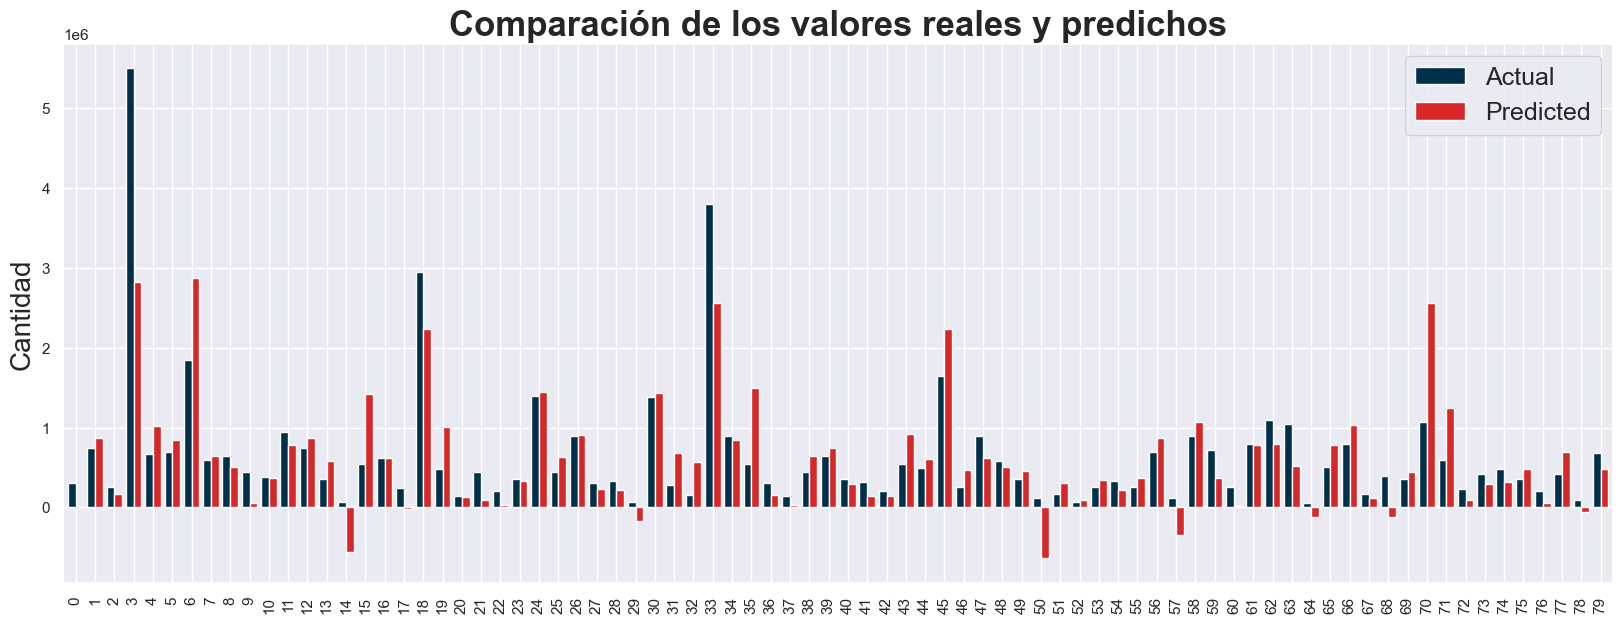

In [21]:
compare_values(residuos_linear_reg[["Actual", "Predicted"]])

Podemos observar los valores predichos contra los valores reales de algunas observaciones. Algo que cabe resaltar es que algunos valores predichos son negativos, lo cual resulta incoherente para nuestro problema, ya que no debería haber ningún valor de un vehículo que sea negativo.

# 8. Supuestos de validez del modelo 
Para que las predicciones que genera un modelo de regresión lineal múltiple tengan total validez, debe cumplir con varios supuestos. Por lo tanto, es necesario comprobar los supuestos del modelo de regresión lineal generado. Sin embargo, en la práctica, rara vez se cumplen o se puede demostrar que se cumplen todos los supuestos. 

Esto no quiere decir que el modelo creado no sea útil; lo mas importante es ser consciente de ellos y del impacto que esto puede tener en las conclusiones que se extraigan del modelo (Rodrigo, 2023). 

## 8.1 Relación Lineal

Este supuesto indica que cada predictor debe estar linealmente relacionado con la variable predicha $y$ mientras los demás predictores se mantienen constantes. Vamos a comprobarlo visualmente a través de gráficos. Además, haremos uso de funciones para simplificar el proceso.

In [22]:
# Creamos una función que nos permite visualizar los residuos del modelo de regresión lineal múltiple
# ==============================================================================
    
def linear_assumption(model, X_test, y_test):
    
    df_results = residuals(model, X_test, y_test)
    
    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)
    
    sns.regplot(x='Actual', 
                y='Predicted', 
                data=df_results, 
                lowess=True, 
                ax=ax[0], 
                line_kws={'color': 'orange','ls':'--','lw':2.5, 'label': 'Linea Generada'}, 
                scatter_kws={'alpha':0.3})
    ax[0].plot([y_test.min(), y_test.max()], 
               [y_test.min(), y_test.max()], 
               color= "red", 
               linewidth= 2.5, 
               linestyle= "dashed", 
               label= "Linea de Referencia")

    ax[0].set_title('Valores Reales vs. Valores Predichos', fontsize=15)
    ax[0].set_xlabel('Reales', fontsize=12)
    ax[0].set_ylabel('Predichos', fontsize=12)
    ax[0].legend()     
    
    sns.regplot(x='Predicted', 
                y='Residuals', 
                data=df_results, 
                lowess=True, 
                ax=ax[1], 
                line_kws={'color': 'orange','ls':'--','lw':2.5, 'label': 'Linea Generada'}, 
                scatter_kws={'alpha': 0.3})
    
    ax[1].axhline(0, color= "red", linewidth= 2.5, linestyle= "dashed", label= "Linea de Referencia")
    ax[1].set_title('Residuos vs Valores Predichos', fontsize=15)
    ax[1].set_xlabel('Predichos', fontsize=12)
    ax[1].set_ylabel('Residuos', fontsize=12)
    ax[1].legend()

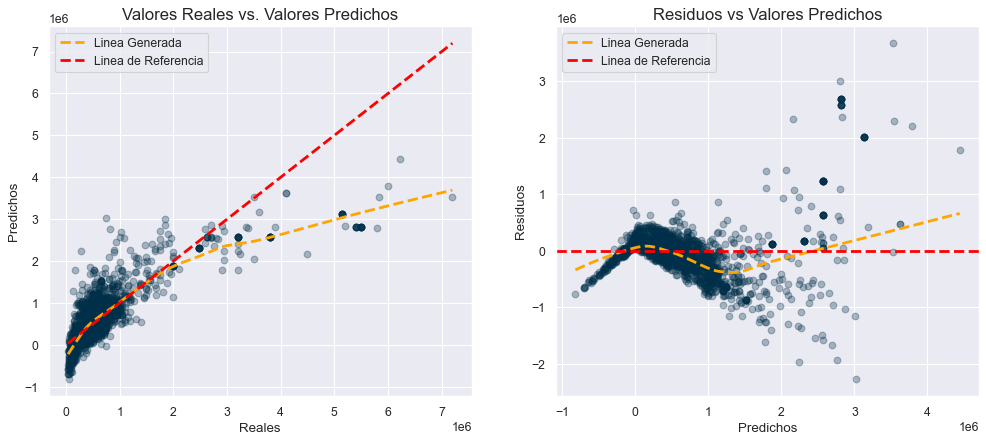

In [23]:
linear_assumption(linear_reg, X_test_escaled, y_test)

Según las visualizaciones que hemos generado, la línea generada debe estar lo más cerca posible de la línea de referencia para que se cumpla el supuesto de relación lineal. Sin embargo, podemos observar que este supuesto no se está cumpliendo en el modelo de regresión lineal múltiple generado.

## 8.2 Normalidad de los Residuos

La normalidad de los residuos es un supuesto importante en la regresión lineal. Si los residuos no siguen una distribución normal alrededor de cero, puede indicar que el modelo no está capturando completamente la estructura subyacente de los datos, Esto puede ocurrir debido a varias razones, como la presencia de valores atípicos, la violación del supuesto de linealidad o la anormalidad en los predictores o la variable objetivo, la normalidad de los residuos es importante para realizar inferencias sobre los parámetros del modelo y para validar la adecuación del modelo. 

Realizaremos un análisis visual de la distribución de los residuos del modelo mediante un histograma y un gráfico Q-Q.

In [24]:
# Aplicamos la regla de Scott para definir el ancho de banda de la distribución de los residuos
# ==============================================================================

def scott(residuos):
    """
    Calcula el ancho de banda utilizando la regla de Scott.

    Parámetros:
    - residuos: Una lista o array de los residuos.

    Retorna:
    - h: El ancho de banda calculado según la regla de Scott.
    """
    n = len(residuos)
    h = 3.5 * np.std(residuos) / n**(1/3)
    return h

In [25]:
# Creamos una función que nos permite visualizar la distribución de los residuos
# Y si cumplen con la normalidad de los mismos
# ==============================================================================

def plot_distribucion(residuos, nivel_significancia: float = 0.05, bindwith: float = None):
    
    if bindwith == "scott":
        bindwith = scott(residuos)
    
    # Ajustar una distribución normal a los residuos
    distribucion = stats.norm
    
    # hallamos los parámetros de la distribución
    parametros = distribucion.fit(residuos)
    
    # Generar valores de x y y para la distribución normal
    X = np.linspace(residuos.min(), residuos.max())
    y = distribucion.pdf(X, *parametros)
    
    # creamos la figura y los ejes
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Graficar histograma de los residuos
    sns.histplot(x=residuos, 
                 stat="density", 
                 ax=axes[0], 
                 binwidth=bindwith, 
                 alpha=0.4
                 )
    
    sns.kdeplot(x=residuos, ax=axes[0], color="blue", linestyle="--", linewidth=2.5, label="Dist. de datos")
    sns.lineplot(x=X, y=y, ax=axes[0], color="red", linestyle="--", linewidth=2.5, label="Dist. normal Teórica")
    axes[0].legend(loc="upper right", fontsize=10)
    axes[0].set_title("Distribución de los residuos", weight="bold")
    axes[0].set_xlabel("Residuos")
    axes[0].set_ylabel("Densidad")
    
    # Calcular media y desviación estándar
    media = np.mean(residuos)
    desviacion_estandar = np.std(residuos)
    
    # Graficar Q-Q plot
    sm.qqplot(residuos, dist= stats.norm, line="s", ax=axes[1], lw=2)
    axes[1].set_title("Gráfica Q-Q", weight="bold")
    axes[1].set_xlabel("Cuantiles teóricos")
    axes[1].set_ylabel("Cuantiles de los residuos")
    axes[1].legend(["Residuos", "Teorico"], loc="upper left", fontsize=10)
    
    fig.tight_layout();

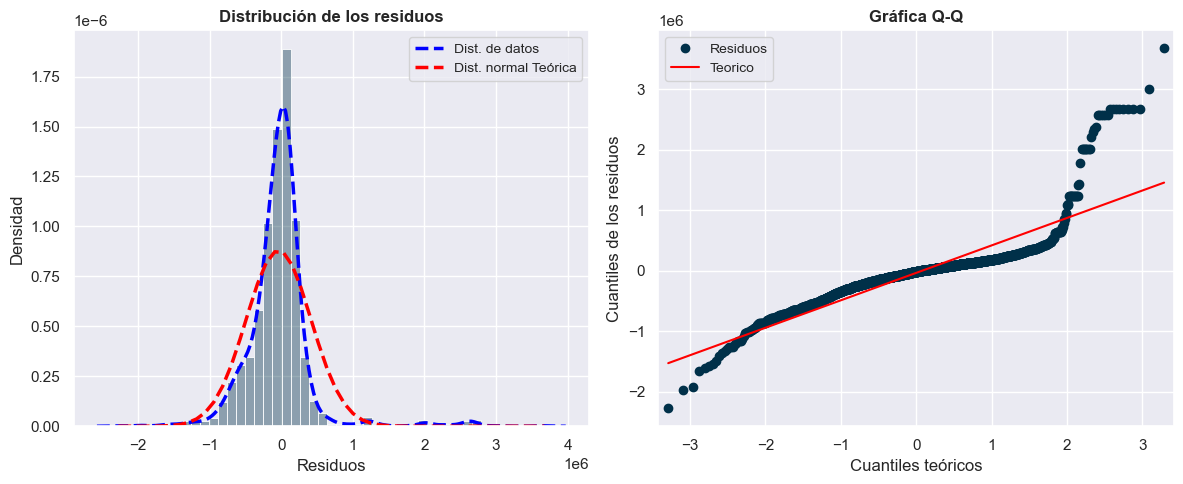

In [26]:
# Comprobamos el supuesto de Normalidad de los residuos
# ==============================================================================

plot_distribucion(residuos_linear_reg["Residuals"], bindwith= 'scott')

Del análisis de normalidad de los residuos, podemos observar lo siguiente:

- En la gráfica Q-Q, hay una excesiva desviación con respecto a la diagonal principal, lo que indica que los residuos tienen una asimetría excesiva.

- Observamos que en los extremos de la diagonal principal de nuestra gráfica Q-Q tienen forma de S, lo que indica que tenemos un valor de curtosis excesiva, es decir, hay demasiados errores o pocos errores grandes en ambas direcciones.

De acuerdo con lo anterior, podemos indicar que el modelo de regresión lineal múltiple generado no cumple con el supuesto de normalidad.

## 8.3 No Colinealidad o Multicolinealidad

Este supuesto se refiere a que en un modelo de regresión lineal múltiple, cada predictor debe ser independiente, es decir, no debe existir colinealidad entre los predictores. La colinealidad ocurre cuando un predictor está linealmente relacionado con uno o varios predictores incluidos en el modelo de regresión lineal múltiple, para comprobar este supuesto, podemos realizar el cálculo del VIF (Factor de Inflación de la Varianza), que es una medida de cuánto se infla la varianza de los coeficientes estimados debido a la multicolinealidad en el modelo.

In [27]:
# Creamos una función que nos permite visualizar la multicolinealidad de las variables
# ==============================================================================

def detectar_multicolinealidad(X, threshold=5.0):
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    multicolinealidad = vif[vif["VIF"] > threshold]

    if multicolinealidad.empty:
        print("No se encontró multicolinealidad en las variables.")
    else:
        print("Variables con multicolinealidad:")
        print(multicolinealidad)

In [28]:
# Comprobamos la multicolinealidad de las variables
# ==============================================================================

detectar_multicolinealidad(X, threshold= 10)

Variables con multicolinealidad:
              Variable   VIF
0                  Age 12.55
2              mileage 17.16
3               engine 48.48
4            max_power 21.44
5                seats 52.67
8  transmission_Manual 12.50


Podemos observar que algunas variables presentan multicolinealidad, lo que indica que el modelo de regresión lineal múltiple no está cumpliendo con el supuesto de multicolinealidad.

## 8.4 No Autocorrelación

Este supuesto se refiere a que cada observación es independiente de las demás. Resulta especialmente útil cuando estamos trabajando con mediciones temporales. Si los errores del modelo están autocorrelacionados, significa que el error en un punto en el tiempo depende del error en un punto anterior en el tiempo, lo que violaría el supuesto de no autocorrelación. Una forma de comprobarlo es a través de la prueba formal Durbin-Watson, que nos permite detectar la presencia de autocorrelación en los residuos del modelo de regresión lineal múltiple que hemos creado.

In [29]:
# Creamos una función que nos permite evaluar la autocorrelación de los residuos
# ==============================================================================

def prueba_autocorrelacion(residuos):
    
    valor_prueba = durbin_watson(residuos)

    # Comprueba si hay autocorrelación
    if valor_prueba < 1.5:
        resultado = f"Durbin_watson: {valor_prueba:.4f}  Los residuos presentan autocorrelación positiva"
    elif valor_prueba > 2.5:
        resultado = f"Durbin_watson: {valor_prueba:.4f}  Los residuos presentan autocorrelación negativa"
    else:
        resultado = f"Durbin_watson: {valor_prueba:.4f}   Los residuos no presentan autocorrelación"

    return resultado

In [30]:
# Comprobamos la autocorrelación de los residuos
# ==============================================================================

prueba_autocorrelacion(residuos_linear_reg["Residuals"])

'Durbin_watson: 1.9219   Los residuos no presentan autocorrelación'

## 8.5 Homocedasticidad

Este supuesto se refiere a que la varianza de la variable de respuesta debe ser constante a lo largo de todo el rango de los predictores. Cuando este supuesto no se cumple, resulta difícil determinar la verdadera desviación estándar de los errores en la predicción del modelo, lo que, por lo general, resulta en unos intervalos de confianza que pueden ser muy amplios o muy estrechos. Para comprobar este supuesto, podemos crear una visualización que compare los residuos del modelo contra los valores predichos.

In [31]:
def homoscedasticity_assumption(modelo, X_test, y_test):

    df_results = residuals(modelo, X_test, y_test)
    
    fig = plt.figure(figsize=(6,6), dpi=80)
    
    sns.regplot(x='Predicted', 
                y='Residuals', 
                data=df_results, 
                lowess=True, 
                line_kws={'color':'red','ls':'--','lw':2.5, 'label': 'Linea Generada'},
                scatter_kws={'alpha':0.3}
                )
    
    plt.axhline(y=0, color='orange', lw= 2.5, ls= '--', label= 'Linea de Referencia')
    plt.title('Residuos vs Valores Predchos', fontsize=15, weight='bold')
    plt.xlabel('Valores Predichos', fontsize=12)
    plt.ylabel('Residuos', fontsize=12)
    plt.legend()
    plt.show()

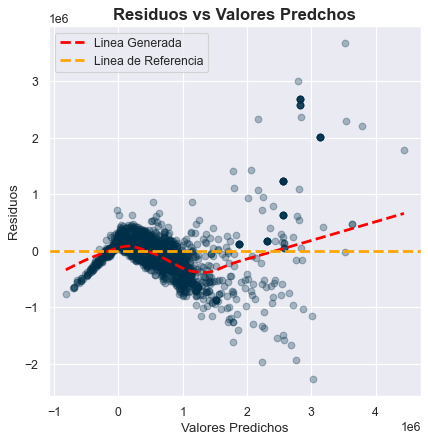

In [32]:
homoscedasticity_assumption(linear_reg, X_test_escaled, y_test)

Como podemos observar, el modelo de regresión lineal múltiple creado no cumple con el supuesto de homocedasticidad, ya que se observa una diferencia considerable entre la línea generada y la línea de referencia.

# 9. Transformación No Lineal de Características

Una forma de mejorar el cumplimiento de los supuestos establecidos para la regresión es aplicar la transformación Box-Cox a todo nuestro conjunto de datos. La transformación no lineal Box-Cox se utiliza generalmente para estabilizar la varianza y hacer que los datos se ajusten mejor a la suposición de normalidad, lo que puede mejorar la calidad del modelo de regresión u otros modelos estadísticos.

Sin embargo, como contrapartida, cuando aplicamos la transformación Box-Cox sobre nuestro conjunto de datos, el modelo resultante se vuelve más complejo de interpretar. Por lo tanto, debemos considerar si su aplicación es realmente necesaria. En este caso, dado que nuestro objetivo principal es que el modelo pueda predecir la variable de respuesta de la forma más precisa posible, podemos utilizar esta transformación.

Ahora, con el fin de evitar posibles fugas de datos, el valor $\lambda$ será ajustado para el conjunto de entrenamiento y luego se utilizará ese mismo valor en el conjunto de datos de prueba.


In [33]:
# Hallamos los valores lambda y lo aplicamos a las variables de entrenamiento del conjunto de datos
# ==============================================================================

valores_lambda = pd.Series(np.zeros(len(df.columns), dtype=np.float64), index=df.columns)

y_train, valores_lambda['selling_price'] = stats.boxcox(y_train+1)
for col in X_train.columns:
    X_train[col], valores_lambda[col] = stats.boxcox(X_train[col]+1)
    
valores_lambda

Age                               -0.22
selling_price                     -0.07
km_driven                          0.40
mileage                            1.28
engine                            -0.48
max_power                         -0.31
seats                             -2.40
seller_type_Individual             8.29
seller_type_Trustmark Dealer     -50.00
transmission_Manual               10.99
owner_Fourth & Above Owner       -73.71
owner_Second Owner                -5.00
owner_Test Drive Car           -2137.71
owner_Third Owner                -22.99
fuel_CNG                        -231.10
fuel_LPG                        -356.29
fuel_Petrol                       -1.01
dtype: float64

- Aplicamos los valores obtenidos de $\lambda$ del conjunto de datos de entrenamiento y los utilizamos en el conjunto de datos de prueba.

In [34]:
# Aplicamos los valores lambda a las variables de prueba del conjunto de datos
# ==============================================================================

y_test = stats.boxcox(y_test+1, valores_lambda['selling_price'])
for col in X_test.columns:
    X_test[col] = stats.boxcox(X_test[col]+1, valores_lambda[col])

Una vez aplicada la transformación Box-Cox a nuestros conjuntos de datos de entrenamiento y de prueba, podemos graficar el cambio en la distribución de cada una de las variables. Para ello, crearemos un DataFrame que contenga todas las variables transformadas, lo que nos permitirá generar las visualizaciones correspondientes.

In [35]:
# Creamos un nuevo conjunto de datos con las variables transformadas
# ==============================================================================

y_train_boxcox = pd.DataFrame(y_train, index=X_train.index, columns=['selling_price'])
y_test_boxcox = pd.DataFrame(y_test, index=X_test.index, columns=['selling_price'])

X_boxcox = pd.concat([X_train, X_test])
y_boxcox = pd.concat([y_train_boxcox, y_test_boxcox])

df_boxcox = pd.concat([X_boxcox, y_boxcox], axis=1)
df_boxcox.sort_index(inplace=True)

Ahora graficaremos las distribuciones de algunas variables cuantitativas, tanto antes como después de aplicar la transformación Box-Cox. Esto nos permitirá visualizar cómo la transformación ha afectado la distribución de los datos.

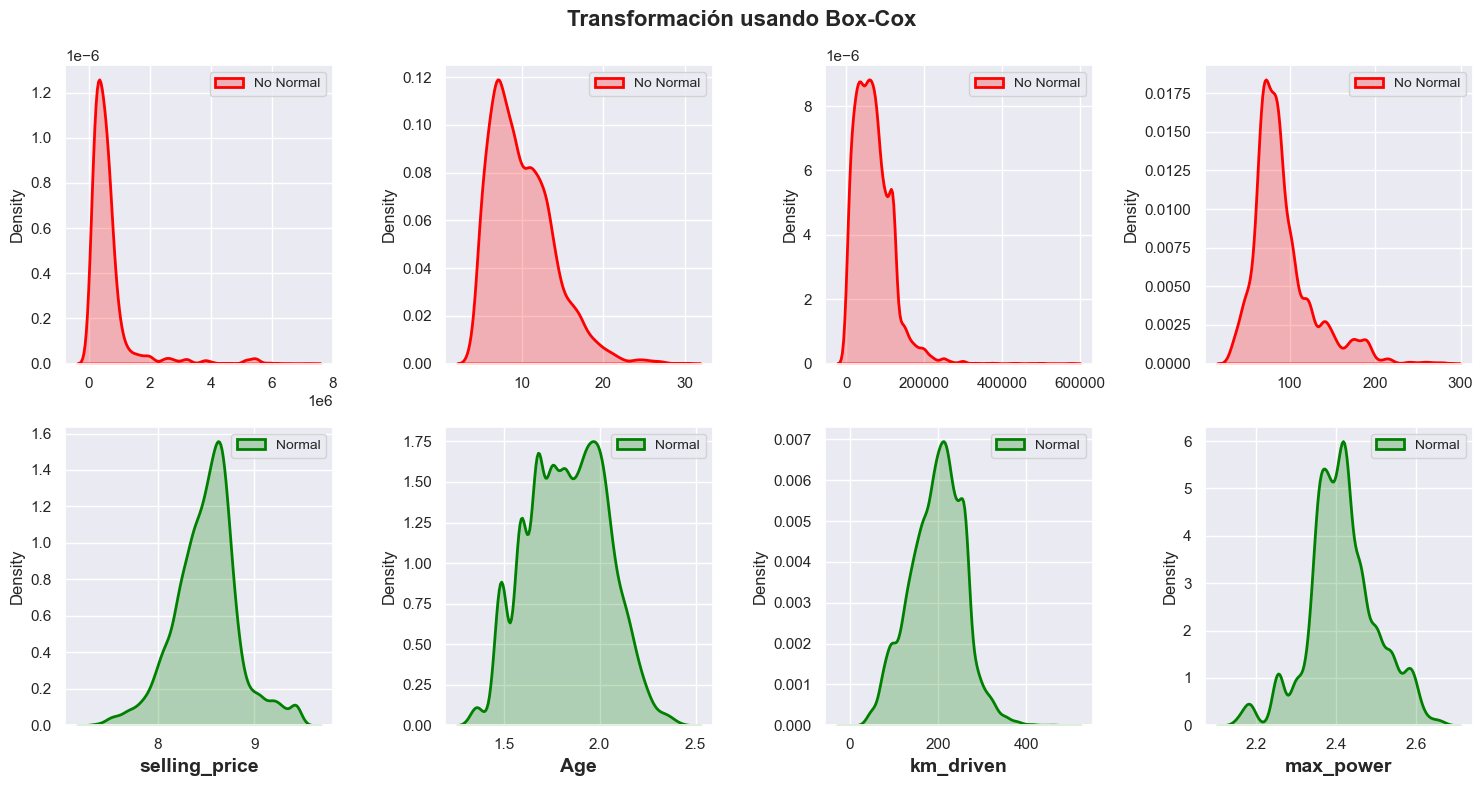

In [36]:
# Graficamos las distribuciones de las variables transformadas con Box-Cox
# ==============================================================================

features = ['selling_price', 'Age', 'km_driven', 'max_power']

fig, axes = plt.subplots(2, 4, figsize=(15, 8))

for i,col in enumerate(features):
    sns.kdeplot(df[col], label="No Normal", fill=True, color= "red", linewidth=2, ax=axes[0,i])
    sns.kdeplot(df_boxcox[col], label="Normal", color= 'green', fill=True, linewidth=2, ax=axes[1,i])  
    axes[0,i].set_xlabel('')
    axes[1,i].set_xlabel(col, fontsize=14, fontweight='bold')
    axes[0,i].legend(loc="upper right", fontsize= 10)
    axes[1,i].legend(loc="upper right", fontsize= 10)

plt.suptitle('Transformación usando Box-Cox', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

Podemos observar que, después de aplicar la transformación Box-Cox, la distribución de cada variable se acerca más a una distribución normal. Esto mejorará los supuestos necesarios para que el modelo de regresión lineal múltiple tenga mayor validez.

## 10. Regresión Polinómica

Ahora procederemos a crear un modelo de regresión polinómica. Esta es una extensión del modelo de regresión lineal, en la cual las variables independientes y la variable de respuesta se modelan como un polinomio de un grado superior. Esto nos permite capturar relaciones que no son lineales. En otras palabras, se agregan predictores adicionales, que se obtienen al elevar cada uno a una potencia, además de interacciones entre cada uno. 

Sin embargo, es importante considerar que, si bien se agrega flexibilidad al modelo para ajustarse mejor a los datos, existe un alto riesgo de sobreajuste. Por esta razón, es fundamental emplear técnicas para contrarrestarlo, como la regularización Ridge y Lasso. Vamos a realizar la regresión polinómica para el conjunto de características de entrenamiento y de prueba, luego de la transformación no lineal Box-Cox.

In [37]:
# Agregamos los terminos polinomiales al conjunto de datos transformado con Box-Cox
# ==============================================================================

poly_model = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = pd.DataFrame(poly_model.fit_transform(X_train), columns= poly_model.get_feature_names_out() ,index=X_train.index)
X_test_poly = pd.DataFrame(poly_model.transform(X_test), columns= poly_model.get_feature_names_out(), index=X_test.index)

X_test_poly

,Age,km_driven,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,...,owner_Third Owner^2,owner_Third Owner fuel_CNG,owner_Third Owner fuel_LPG,owner_Third Owner fuel_Petrol,fuel_CNG^2,fuel_CNG fuel_LPG,fuel_CNG fuel_Petrol,fuel_LPG^2,fuel_LPG fuel_Petrol,fuel_Petrol^2
2413,1.75,198.39,45.46,2.02,2.38,0.41,37.53,0.00,185.20,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4145,1.75,99.71,24.92,2.02,2.47,0.41,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25
3251,1.49,68.05,35.21,2.02,2.41,0.41,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25
1139,1.59,153.50,34.52,2.02,2.41,0.41,37.53,0.00,185.20,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25
6787,1.81,243.72,46.42,2.02,2.36,0.41,37.53,0.00,185.20,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,1.59,194.33,50.16,2.02,2.43,0.41,37.53,0.00,185.20,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
682,2.12,262.27,23.43,2.04,2.34,0.42,37.53,0.00,185.20,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5025,2.05,253.25,19.65,2.03,2.50,0.42,37.53,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4428,1.87,253.25,52.43,2.02,2.45,0.41,37.53,0.00,185.20,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Podemos observar que al aplicar la regresión polinómica, pasamos de tener solo 16 columnas a tener 152. Dado este aumento significativo en el número de características, resulta fundamental aplicar modelos de regularización para disminuir la cantidad de predictores y, a su vez, la multicolinealidad que se puede presentar con este conjunto de datos.

Primero, necesitamos escalar los datos polinomiales para luego entrenar el modelo con la implementación de la regularización Lasso.

In [38]:
# Escalamos los datos del conjunto de datos transformado con Box-Cox y con terminos polinomiales
# ==============================================================================

escalador = StandardScaler()

X_train_poly_escaled = escalador.fit_transform(X_train_poly)
X_test_poly_escaled = escalador.transform(X_test_poly)

# 11. Regularización Lasso

La regularización Lasso es una técnica que fuerza los coeficientes de los predictores a tender a cero. Cuando un predictor tiene un coeficiente de cero, no influye en la predicción del modelo de regresión, lo que permite excluir los predictores menos relevantes. La regularización Lasso agrega un término de penalización a la función de pérdida durante el entrenamiento del modelo.

Una técnica común para obtener el valor óptimo del término de penalización es la validación cruzada. Lo que minimiza la cantidad de predictores que el modelo utiliza y ayuda a optimizar el rendimiento del modelo en datos de prueba. A continuación, implementaremos la regularización Lasso y evaluaremos su efectividad.

In [39]:
# Creamos un modelo de regresión lineal múltiple con los términos polinomiales
# ==============================================================================

lasso_modelCV = LassoCV( alphas = np.logspace(-10, 3, 200), 
                      max_iter= 1000,
                      fit_intercept = True, 
                      cv = 10, 
                      verbose= False, 
                      random_state=1234)

lasso_modelCV.fit(X_train_poly_escaled, y_train)

LassoCV(alphas=array([1.00000000e-10, 1.16232247e-10, 1.35099352e-10, 1.57029012e-10,
       1.82518349e-10, 2.12145178e-10, 2.46581108e-10, 2.86606762e-10,
       3.33129479e-10, 3.87203878e-10, 4.50055768e-10, 5.23109931e-10,
       6.08022426e-10, 7.06718127e-10, 8.21434358e-10, 9.54771611e-10,
       1.10975250e-09, 1.28989026e-09, 1.49926843e-09, 1.74263339e-09,
       2.02550194e-09, 2.35428641e-0...
       3.14403547e+01, 3.65438307e+01, 4.24757155e+01, 4.93704785e+01,
       5.73844165e+01, 6.66991966e+01, 7.75259749e+01, 9.01101825e+01,
       1.04737090e+02, 1.21738273e+02, 1.41499130e+02, 1.64467618e+02,
       1.91164408e+02, 2.22194686e+02, 2.58261876e+02, 3.00183581e+02,
       3.48910121e+02, 4.05546074e+02, 4.71375313e+02, 5.47890118e+02,
       6.36824994e+02, 7.40196000e+02, 8.60346442e+02, 1.00000000e+03]),
        cv=10, random_state=1234)

Ahora que hemos determinado el valor óptimo de $\alpha$, vamos a entrenar un modelo de regresión utilizando este valor. Este proceso nos permitirá mejorar la precisión de nuestras predicciones y reducir la influencia de los predictores menos relevantes. 

In [40]:
# Creamos un modelo con el valor de alpha que minimiza el error 
# ==============================================================================

lasso_model = Lasso(alpha=float(lasso_modelCV.alpha_))
lasso_model.fit(X_train_poly_escaled, y_train)

Lasso(alpha=1e-10)

## 11.1 Evaluación del Modelo

A continuación, vamos a evaluar la precisión del modelo creado utilizando la regularización Lasso con los datos de prueba. Evaluaremos su desempeño y compararemos las métricas de bondad de ajuste con las obtenidas en los modelos anteriores para verificar si hemos logrado mejorar la predicción del precio de los vehículos.

In [41]:
# Obtenemos los residuos del modelo de regresión lineal múltiple con términos polinomiales
# ==============================================================================

residuos_lasso = residuals(lasso_modelCV, X_test_poly_escaled, y_test)

In [42]:
# Evaluamos el modelo de regresión Lasso
# ==============================================================================

evaluacion_modelo(lasso_modelCV, X_test_poly_escaled, y_test, "Regresión Lasso")

,Modelo,MAE,MSE,RMSE,R2
0,Regresión Lasso,0.08,0.01,0.11,0.89


Como podemos observar, el coeficiente de determinación $R^2$ ahora es de 0.89, lo que indica que el modelo es capaz de explicar el 89% de la variabilidad de la variable de respuesta a través del conjunto de características. Si consideramos que el primer modelo de regresión lineal múltiple tenía un coeficiente de determinación de 0.67, hemos aumentado considerablemente la precisión del modelo. Al implementar términos polinomiales y aplicar la regularización Lasso, hemos mejorado significativamente el rendimiento. Ahora vamos a observar cuántos predictores está utilizando este modelo de regresión lineal múltiple. Para comprobarlo, realizaremos un conteo de los predictores que sean diferentes de 0, ya que los coeficientes con un valor de 0 no influirán en las predicciones del modelo.

In [43]:
# Hallamos el número de coeficientes diferentes a 0 del modelo de regresión Lasso
# ==============================================================================

lasso_coef = pd.DataFrame(lasso_model.coef_, index=X_train_poly.columns, columns=['Lasso Coef.'])
lasso_coef = lasso_coef[lasso_coef['Lasso Coef.']!=0]
lasso_coef = lasso_coef.T

print(f'El número de predictores que utiliza el modelo es: {lasso_coef.size}')


El número de predictores que utiliza el modelo es: 133


El modelo utiliza 133 predictores para explicar el 89% de la variabilidad de la variable de respuesta.

## 11.2 Validación Cruzada

A continuación, vamos a evaluar el modelo utilizando la técnica de validación cruzada. Para ello, crearemos una clase que realice la transformación Box-Cox, la cual será introducida en un Pipeline. Esto garantizará que no haya ninguna fuga de datos entre el conjunto de datos de prueba y los datos de entrenamiento.

In [44]:
# Creamos la clase BoxCoxTransformer para aplicar la transformación Box-Cox a los datos
# ==============================================================================

class BoxCoxTransformer():
    def __init__(self):
        self.lambdas = {}

    def fit(self, X, y=None):
        for col in X.columns:
            if X[col].nunique() > 1:  # Comprobar si la columna no es constante
                _, self.lambdas[col] = stats.boxcox(X[col] + 1)
        return self

    def transform(self, X, y=None):
        for col in X.columns:
            if col in self.lambdas:
                X[col] = stats.boxcox(X[col] + 1, self.lambdas[col])
        return X

In [45]:
# Aplicamos la técnica de validacion cruzada al modelo de regresión Lasso
# ==============================================================================

pipeline = make_pipeline(BoxCoxTransformer(),PolynomialFeatures(degree=2), StandardScaler(),  Lasso(lasso_modelCV.alpha_))

kf = KFold(n_splits=10, shuffle=True, random_state=0) 
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result2 = cross_validate(pipeline, X, y, cv=kf, scoring=scoring)

MAE_mean = (-result2['test_neg_mean_absolute_error']).mean()
MAE_std = (-result2['test_neg_mean_absolute_error']).std()
MSE_mean = (-result2['test_neg_mean_squared_error']).mean()
MSE_std = (-result2['test_neg_mean_squared_error']).std()
RMSE_mean = (-result2['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result2['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result2['test_r2'].mean()
R2_Score_std = result2['test_r2'].std()

pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std]},
             index=['MAE', 'MSE', 'RMSE' ,'R2-Score'])

,Mean,Std
MAE,176044.25,9691.45
MSE,92934510973.95,20793133826.70
RMSE,303009.37,33463.88
R2-Score,0.86,0.02


Como podemos observar, el coeficiente de determinación $R^2$ obtenido con los datos de prueba es, en promedio, 0.86. Esto indica que el modelo es capaz de explicar el 86% de la variabilidad de la variable de respuesta a través del conjunto de características. Una vez creado el modelo, vamos a evaluar los supuestos necesarios para asegurar que las predicciones realizadas por el modelo tengan validez.

## 11.3 Supuestos del modelo

- Vamos a evaluar el supuesto de relación lineal en el modelo creado.

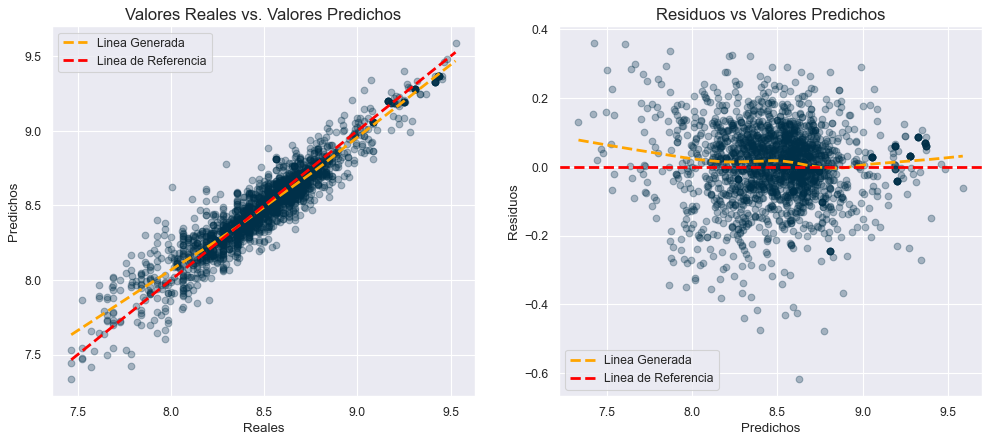

In [46]:
# Evaluamos el suspuesto de linealidad del modelo de regresión Lasso
# ==============================================================================

linear_assumption(lasso_model, X_test_poly_escaled, y_test)

- Ahora vamos a evaluar la distribución de los residuos para el supuesto de normalidad.

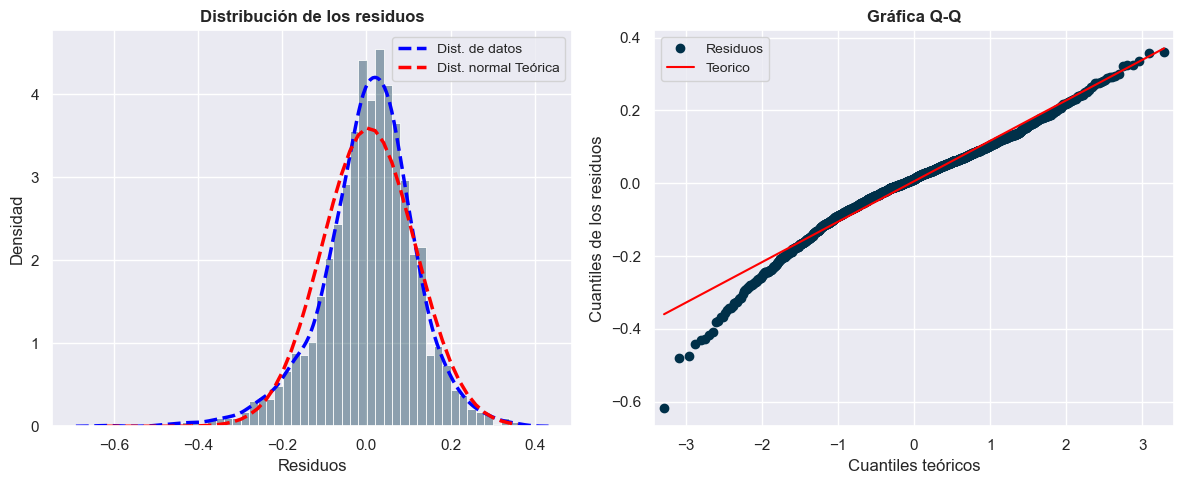

In [47]:
#Evaluamos el supuesto de normalidad de los residuos del modelo de regresión Lasso
# ==============================================================================

plot_distribucion(residuos_lasso["Residuals"])

- Vamos a evaluar la multicolinealidad del modelo.

In [48]:
# Evaluamos el supuesto de multicolinealidad del modelo de regresión Lasso
# ==============================================================================

X_poly = pd.concat([X_train_poly, X_test_poly])
predictores = X_poly[lasso_coef.columns]

detectar_multicolinealidad(X= predictores, threshold= 10)

Variables con multicolinealidad:
                             Variable                 VIF
0                                 Age         69412394.84
1                           km_driven          7368787.74
2                             mileage         11862495.02
3                              engine      43675292534.78
4                           max_power        662913497.02
..                                ...                 ...
125  owner_Test Drive Car fuel_Petrol 3002399751580330.50
126               owner_Third Owner^2                 inf
130                        fuel_CNG^2                 inf
131                        fuel_LPG^2                 inf
132                     fuel_Petrol^2                 inf

[125 rows x 2 columns]


- Ahora vamos a evaluar el supuesto de No Autocorrelación.

In [49]:
# Realizamos la prueba de autocorrelación de los residuos del modelo de regresión Lasso
# ==============================================================================

prueba_autocorrelacion(residuos_lasso["Residuals"])

'Durbin_watson: 1.9661   Los residuos no presentan autocorrelación'

- Evaluamos si el modelo presenta homocedasticidad.

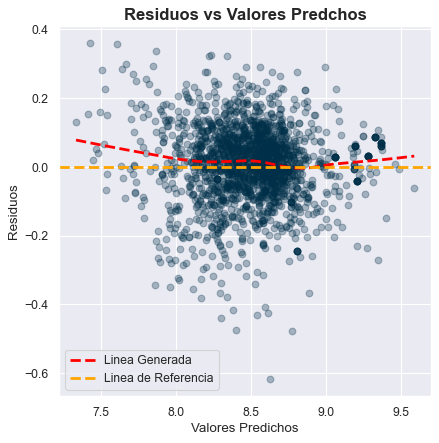

In [50]:
# Evaluamos el supuesto de Homocedasticidad del modelo de regresión Lasso
# ==============================================================================

homoscedasticity_assumption(lasso_model, X_test_poly_escaled, y_test)

# 12. Conclusiones

Del ejercicio realizado, podemos concluir lo siguiente:

- El modelo creado utilizando términos polinomiales y aplicando la técnica de regularización Lasso obtuvo un coeficiente de determinación de 0.86. Esto indica que el modelo es capaz de explicar el 86% de la variabilidad de la variable de respuesta a través del conjunto de características, lo cual es una mejora considerable en comparación con el primer modelo de regresión, que obtuvo un coeficiente de determinación \(R^2\) de 0.67.

- El modelo de regresión lineal múltiple que implementa el conjunto de datos con términos polinomiales utiliza 133 predictores, lo que representa un aumento considerable en el número de predictores. Es posible utilizar el valor de alpha añadiéndole una desviación estándar para disminuir considerablemente el número de predictores que utiliza el modelo, sin apenas disminuir la precisión del mismo.

- El supuesto de relación lineal en el modelo que implementa términos polinomiales mejoró considerablemente en comparación con el modelo de regresión lineal múltiple sin términos polinomiales, lo cual aumenta la validez del modelo para predecir nuevos valores en función de sus características.

- El modelo de regresión lineal múltiple que implementa el conjunto de datos con términos polinomiales cumple de mejor manera el supuesto de normalidad. Es decir, la distribución de los residuos del modelo se ajusta mejor a una distribución normal, contribuyendo al cumplimiento del supuesto de normalidad del modelo, lo que a su vez mejora su validez.

- El modelo creado con términos polinomiales presenta un número considerable de variables que presentan multicolinealidad. Una manera de mitigar este problema es añadiendo al valor de alpha una desviación estándar. Con ello, el número de predictores que utiliza el modelo se verá disminuido, lo que podría reducir la presencia de multicolinealidad en el modelo implementado.

- El modelo presenta homocedasticidad, es decir, los errores se distribuyen de manera uniforme en torno a cero. Como podemos observar, la línea generada por el modelo está bastante cerca de la línea de referencia, lo que sugiere que el modelo presenta homocedasticidad, contribuyendo al cumplimiento de los supuestos de validez del modelo.

# Referencias Bibliográficas

- Carlos Véliz. (2020). Aprendizaje automático. Introducción al aprendizaje profundo. El Fondo Editorial de la Pontificia Universidad Católica del Perú.

- Abuín, J. R. (2007). Regresión lineal múltiple. IdEyGdM-Ld Estadística, Editor, 32.

- Giuseppe Bonaccorso. (2018). Machine Learning Algorithms : Popular Algorithms for Data Science and Machine Learning, 2nd Edition: Vol. 2nd ed. Packt Publishing.

- Regresión lineal con python - Ciencia de datos. https://cienciadedatos.net/documentos/py10-regresion-lineal-python

- Minguillón, J. Casas, J. y Minguillón, J. (2017). Minería de datos: modelos y algoritmos. Editorial UOC.

- Pratap Dangeti. (2017). Statistics for Machine Learning : Build Supervised, Unsupervised, and Reinforcement Learning Models Using Both Python and R. Packt Publishing.

- Dagnino, J. (2014). Regresión lineal. Rev. Chil. Anest, 43(2). https://www.sachile.cl/upfiles/revistas/54e63943b5d69_14_regresion-2-2014_edit.pdf
